In [2]:
import torch
import math
from scipy.special import gamma
import matplotlib.pyplot as plt
import libra_py.dynamics.bohmian.compute as compute
#import libra_py.dynamics.tsh.plot as tsh_plot
import libra_py.units as units

%matplotlib inline

# 1. Plotting quantum potentials

In [24]:
def plot_rho_quant_pot(X, sigma, mass, TBF, title):
    x = torch.linspace(-2.0, 2.0, 1001, requires_grad=True)
    rho, U = [], []
    for _x in x:
        f = TBF(_x.view(1,1), X, sigma) # compute.rho_lorentzian
        u = compute.quantum_potential_original_gen(_x.view(1,1), X, sigma, mass, TBF) #compute.rho_lorentzian)
        rho.append(f.detach())
        U.append(u.detach())
    x = x.detach()

    # Create 1 row, 2 columns of subplots
    fig, axs = plt.subplots(1, 2, figsize=(8, 4)) # sharex=True, sharey=True)
    
    axs[0].plot(x, rho, color="red") 
    axs[0].set_ylabel('Probability Density', fontsize=18)
    axs[1].plot(x, U, color="red") 
    axs[1].set_ylabel('Quantum Potential', fontsize=18)
    
    # Centered shared x-axis label
    fig.suptitle(title, fontsize=20)
    fig.supxlabel('Coordinate, a.u.', fontsize=18)
    plt.tight_layout()
    plt.show()

In [13]:
X = torch.tensor([ [0.0], 
                   [1.0], 
                   [1.2] 
                 ])
sigma = torch.tensor([0.1])
mass = torch.tensor( [1.0] )

print(X.shape, X)
print(sigma.shape, sigma)
print(mass.shape, mass)

torch.Size([3, 1]) tensor([[0.0000],
        [1.0000],
        [1.2000]])
torch.Size([1]) tensor([0.1000])
torch.Size([1]) tensor([1.])


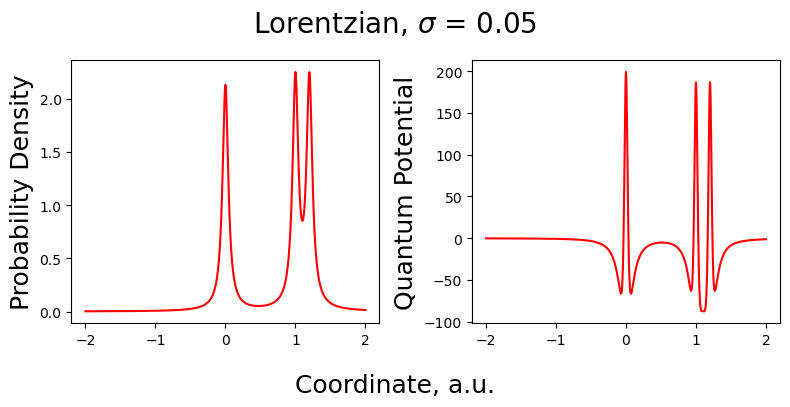

In [14]:
sigma = torch.tensor([0.05])
plot_rho_quant_pot(X, sigma, mass, compute.rho_lorentzian, "Lorentzian, $\sigma$ = 0.05")

In [15]:
sigma = torch.tensor([0.05])
plot_rho_quant_pot(X, sigma, mass, compute.rho_mv_cauchy, "Multivariate Cauchy, $\sigma$ = 0.05")

In [6]:
#%%timeit
Q = X.clone().detach().requires_grad_(True)
compute.quantum_potential_original(Q, sigma, mass, compute.rho_lorentzian)

tensor([-3.5497], grad_fn=<AddBackward0>)

In [7]:
Q = X.clone().detach().requires_grad_(True)
compute.quantum_potential(Q, sigma, mass, compute.rho_lorentzian)

tensor(-3.5497, grad_fn=<AddBackward0>)

In [8]:
q_pot = compute.quantum_potential(Q, sigma, mass, compute.rho_lorentzian)
[q_force] = torch.autograd.grad( q_pot, [Q], create_graph=False, retain_graph=False)

print(q_force)

tensor([[-2.8255e-02],
        [-6.1289e+01],
        [ 6.1317e+01]])


In [9]:
Q = X.clone().detach().requires_grad_(True)
compute.quantum_potential_original(Q, sigma, mass, compute.rho_mv_cauchy)

tensor([-3.5497], grad_fn=<AddBackward0>)

In [10]:
Q = X.clone().detach().requires_grad_(True)
compute.quantum_potential(Q, sigma, mass, compute.rho_mv_cauchy)

tensor(-3.5497, grad_fn=<AddBackward0>)

In [11]:
q_pot = compute.quantum_potential(Q, sigma, mass, compute.rho_mv_cauchy)
[q_force] = torch.autograd.grad( q_pot, [Q], create_graph=False, retain_graph=False)

print(q_force)

tensor([[-2.8255e-02],
        [-6.1289e+01],
        [ 6.1317e+01]])


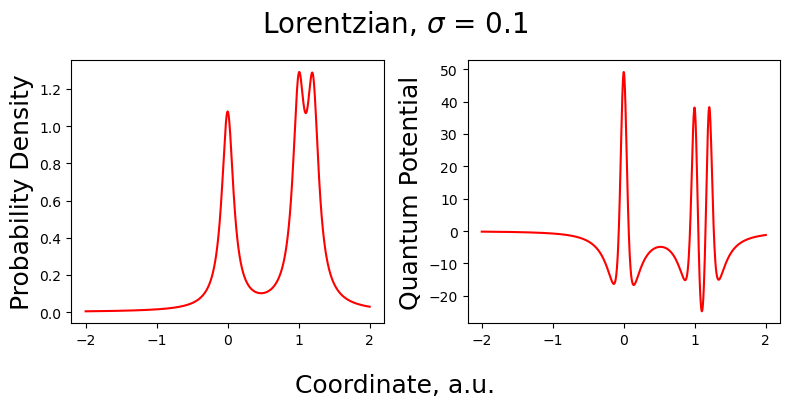

In [16]:
sigma = torch.tensor( [0.1] )
plot_rho_quant_pot(X, sigma, mass, compute.rho_lorentzian, "Lorentzian, $\sigma$ = 0.1")

In [17]:
sigma = torch.tensor([0.1])
plot_rho_quant_pot(X, sigma, mass, compute.rho_mv_cauchy, "Multivariate Cauchy, $\sigma$ = 0.1")

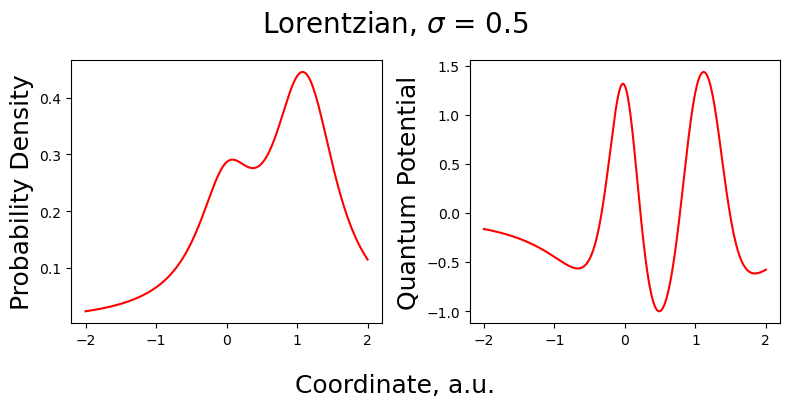

In [19]:
sigma = torch.tensor( [0.5] )
plot_rho_quant_pot(X, sigma, mass, compute.rho_lorentzian, "Lorentzian, $\sigma$ = 0.5")

In [20]:
sigma = torch.tensor([0.5])
plot_rho_quant_pot(X, sigma, mass, compute.rho_mv_cauchy, "Multivariate Cauchy, $\sigma$ = 0.5")

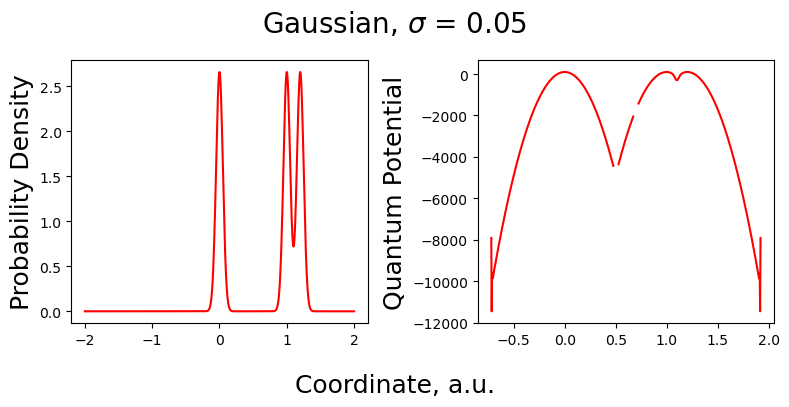

In [25]:
sigma = torch.tensor( [0.05] )
plot_rho_quant_pot(X, sigma, mass, compute.rho_gaussian, "Gaussian, $\sigma$ = 0.05")

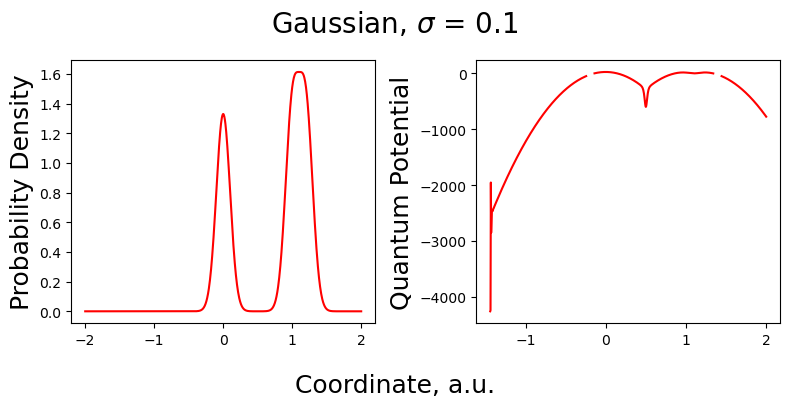

In [26]:
sigma = torch.tensor( [0.1] )
plot_rho_quant_pot(X, sigma, mass, compute.rho_gaussian, "Gaussian, $\sigma$ = 0.1")

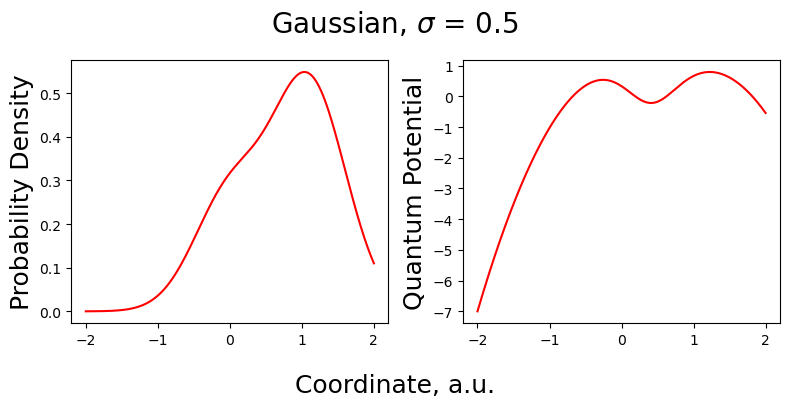

In [16]:
sigma = torch.tensor( [0.5] )
plot_rho_quant_pot(X, sigma, mass, compute.rho_gaussian, "Gaussian, $\sigma$ = 0.5")

# 2. Plotting transmission probabilities

In [19]:
def plot_pop(plt, file_cl, file_bohm, file_qm, title):

    # Load the files
    f_cl = torch.load(file_cl, weights_only=False)
    f_bo1 = torch.load(F"{file_bohm}-1.pt", weights_only=False)  # sigma = 0.1, dt = 5
    f_bo2 = torch.load(F"{file_bohm}-2.pt", weights_only=False)  # sigma = 0.5, dt = 5 
    #f_bo3 = torch.load(F"{file_bohm}-3.pt", weights_only=False)  # sigma = 0.05, dt = 5 - poor energy conservation
    f_bo3b = torch.load(F"{file_bohm}-3b.pt", weights_only=False)# sigma = 0.05, dt = 2.5 - good energy conservation
    #f_bo_best = torch.load(F"{file_bohm}-best.pt")  # selecting the best parameters for all cases 
    f_qm = torch.load(file_qm, weights_only=False)
    
    
    plt.rc('axes', titlesize=24)      # fontsize of the axes title
    plt.rc('axes', labelsize=24)      # fontsize of the x and y labels
    plt.rc('legend', fontsize=24)     # legend fontsize
    plt.rc('xtick', labelsize=24)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=24)    # fontsize of the tick labels

    plt.rc('figure.subplot', left=0.2)
    plt.rc('figure.subplot', right=0.95)
    plt.rc('figure.subplot', bottom=0.13)
    plt.rc('figure.subplot', top=0.88)
    
    plt.figure(figsize=(4, 4)) # dpi=300, frameon=False)    
    plt.subplot(1, 1, 1)
    plt.xlim(0, 30)
    plt.ylim(0, 0.45)

    plt.title(F"{title}", fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Time, fs', fontsize=18)
    plt.ylabel('Probability', fontsize=18)

    t, P = f_cl["t"], f_cl["P"]
    plt.plot(t[:]/units.fs2au, P[:], label="classical", linewidth=5, color="red")


    t, P = f_bo2["t"], f_bo2["P"]
    plt.plot(t[:]/units.fs2au, P, label="bohmian, $\sigma$ = 0.5", linewidth=5, color="cyan")
    
    t, P = f_bo1["t"], f_bo1["P"]
    plt.plot(t[:]/units.fs2au, P, label="bohmian, $\sigma$ = 0.1", linewidth=5, color="blue")
    
    t, P = f_bo3b["t"], f_bo3b["P"]
    plt.plot(t[:]/units.fs2au, P, label="bohmian, $\sigma$ = 0.05", linewidth=5, color="black")

    #t, P = f_bo_best["t"], f_bo_best["P"]
    #plt.plot(t[:]/units.fs2au, P, label="bohmian, $\sigma$ = best", ls="dotted", color="black")
    
    t, P = torch.tensor(f_qm["time"]), f_qm["population_right"]
    plt.plot(t[:]/units.fs2au, P, label="quantum", linewidth=5, color="green")

    
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

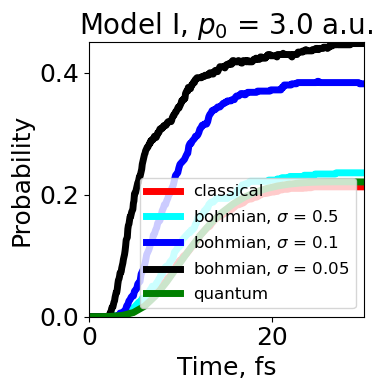

In [20]:
title = "Model I, $p_0$ = 3.0 a.u."
#plot_pop(plt, "classical-MartensI-case1-1.pt", "bohmian-lorentzian-MartensI-case1", "MartensI-case1-exact.pt", title)
plot_pop(plt, "classical-MartensI-case1-1.pt", "bohmian-mv_cauchy-MartensI-case1", "MartensI-case1-exact.pt", title)

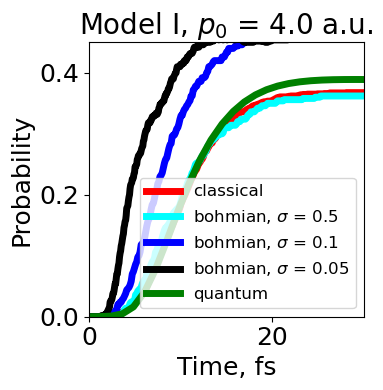

In [21]:
title = "Model I, $p_0$ = 4.0 a.u."
#plot_pop(plt, "classical-MartensI-case2-1.pt", "bohmian-lorentzian-MartensI-case2", "MartensI-case2-exact.pt", title)
plot_pop(plt, "classical-MartensI-case2-1.pt", "bohmian-mv_cauchy-MartensI-case2", "MartensI-case2-exact.pt", title)

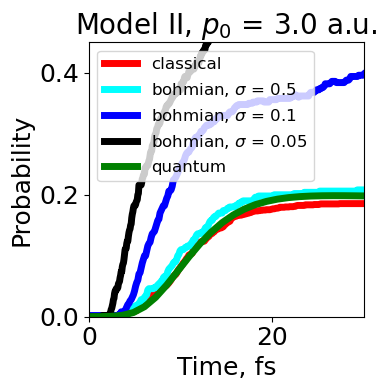

In [22]:
title = "Model II, $p_0$ = 3.0 a.u."
#plot_pop(plt, "classical-MartensII-case1-1.pt", "bohmian-lorentzian-MartensII-case1", "MartensII-case1-exact.pt", title)
plot_pop(plt, "classical-MartensII-case1-1.pt", "bohmian-mv_cauchy-MartensII-case1", "MartensII-case1-exact.pt", title)

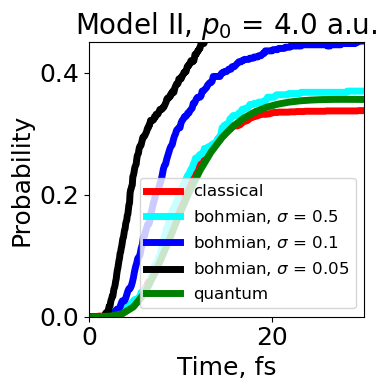

In [23]:
title = "Model II, $p_0$ = 4.0 a.u."
#plot_pop(plt, "classical-MartensII-case2-1.pt", "bohmian-lorentzian-MartensII-case2", "MartensII-case2-exact.pt", title)
plot_pop(plt, "classical-MartensII-case2-1.pt", "bohmian-mv_cauchy-MartensII-case2", "MartensII-case2-exact.pt", title)

# 3. Plotting total energies

In [24]:
def plot_energy(plt, file_cl, file_bohm, file_qm, title):

    # Load the files
    f_cl = torch.load(file_cl, weights_only=False)
    f_bo1 = torch.load(F"{file_bohm}-1.pt", weights_only=False)  # sigma = 0.1, dt = 5
    f_bo2 = torch.load(F"{file_bohm}-2.pt", weights_only=False)  # sigma = 0.5, dt = 5 
    #f_bo3 = torch.load(F"{file_bohm}-3.pt", weights_only=False)  # sigma = 0.05, dt = 5 - poor energy conservation
    f_bo3b = torch.load(F"{file_bohm}-3b.pt", weights_only=False)# sigma = 0.05, dt = 2.5 - good energy conservation
    f_qm = torch.load(file_qm, weights_only=False)
    
    
    plt.rc('axes', titlesize=24)      # fontsize of the axes title
    plt.rc('axes', labelsize=24)      # fontsize of the x and y labels
    plt.rc('legend', fontsize=24)     # legend fontsize
    plt.rc('xtick', labelsize=24)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=24)    # fontsize of the tick labels

    plt.rc('figure.subplot', left=0.2)
    plt.rc('figure.subplot', right=0.95)
    plt.rc('figure.subplot', bottom=0.13)
    plt.rc('figure.subplot', top=0.88)


    plt.figure(figsize=(4, 4)) # dpi=300, frameon=False)    
    plt.subplot(1, 1, 1)
    plt.xlim(0, 30)

    plt.title(F"{title}", fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Time, fs', fontsize=18)
    plt.ylabel('Energy, a.u.', fontsize=18)


    t, P = f_cl["t"], f_cl["E"][:, 3].detach()
    plt.plot(t[:]/units.fs2au, P[:], label="classical", linewidth=5, color="red")

    t, P = f_bo2["t"], f_bo2["E"][:, 3].detach()
    plt.plot(t[:]/units.fs2au, P, label="bohmian, $\sigma$ = 0.5", linewidth=5, color="cyan")

    t, P = f_bo1["t"], f_bo1["E"][:, 3].detach()
    plt.plot(t[:]/units.fs2au, P, label="bohmian, $\sigma$ = 0.1", linewidth=5, color="blue")
    
    t, P = f_bo3b["t"], f_bo3b["E"][:, 3].detach()
    plt.plot(t[:]/units.fs2au, P, label="bohmian, $\sigma$ = 0.05", linewidth=5, color="black")
    
    t, P = torch.tensor(f_qm["time"]), f_qm["total_energy"]
    plt.plot(t[:]/units.fs2au, P, label="quantum", linewidth=5, color="green")

    
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

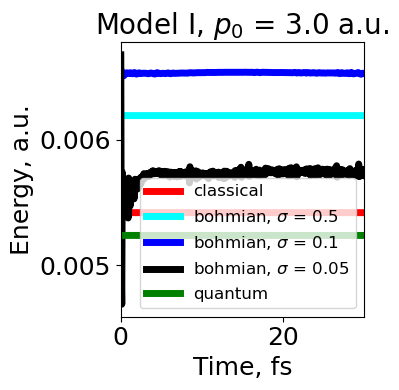

In [25]:
title = "Model I, $p_0$ = 3.0 a.u."
#plot_energy(plt, "classical-MartensI-case1-1.pt", "bohmian-lorentzian-MartensI-case1", "MartensI-case1-exact.pt", title)
plot_energy(plt, "classical-MartensI-case1-1.pt", "bohmian-mv_cauchy-MartensI-case1", "MartensI-case1-exact.pt", title)

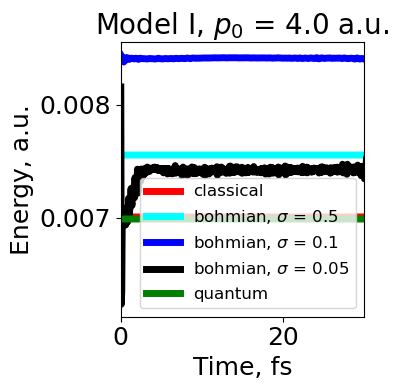

In [26]:
title = "Model I, $p_0$ = 4.0 a.u."
#plot_energy(plt, "classical-MartensI-case2-1.pt", "bohmian-lorentzian-MartensI-case2", "MartensI-case2-exact.pt", title)
plot_energy(plt, "classical-MartensI-case2-1.pt", "bohmian-mv_cauchy-MartensI-case2", "MartensI-case2-exact.pt", title)

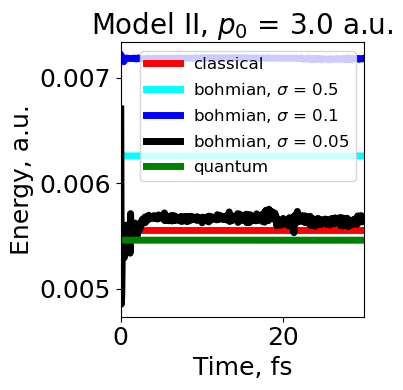

In [28]:
title = "Model II, $p_0$ = 3.0 a.u."
#plot_energy(plt, "classical-MartensII-case1-1.pt", "bohmian-lorentzian-MartensII-case1", "MartensII-case1-exact.pt", title)
plot_energy(plt, "classical-MartensII-case1-1.pt", "bohmian-mv_cauchy-MartensII-case1", "MartensII-case1-exact.pt", title)

In [29]:
title = "Model II, $p_0$ = 4.0 a.u."
#plot_energy(plt, "classical-MartensII-case2-1.pt", "bohmian-lorentzian-MartensII-case2", "MartensII-case2-exact.pt", title)
plot_energy(plt, "classical-MartensII-case2-1.pt", "bohmian-mv_cauchy-MartensII-case2", "MartensII-case2-exact.pt", title)

# 4. Plotting quantum dynamics

In [30]:
#f = torch.load("MartensI-case1-exact.pt")
def plot_quantum_dynamics(filename, title):
    
    f = torch.load(filename, weights_only=False) #"MartensII-case1-exact.pt")
    # Create 2 row, 2 columns of subplots
    fig, axs = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True)
    
    for num, i in enumerate([0, 100, 200, 290]):     
        n = f["save_every_n_steps"]
        dt = f["dt"]
        Q = f["Q"]
        V = f["V"]
        t = i * dt /units.fs2au
        psi = f["psi_all"][int(i/n)]
        rho = (torch.abs( psi ) )**2 
        a, b = int((num - num%2)/2), int(num % 2)
        axs[a, b].set_title(F"t = { round(t,0) } fs", fontsize=24)
        axs[a, b].set_xlim(-5.0, 5.0)
        axs[a, b].set_ylim(-2.0, 2.0)
    
        axs[a, b].contourf(Q[0], Q[1], rho, levels=100, cmap="hot")
        axs[a,b].contour(Q[0], Q[1], V, levels=100, colors='red', linestyles='--')

    # Centered shared x-axis label
    fig.suptitle(title, fontsize=24)
    fig.supxlabel('X coordinate, a.u.', fontsize=20)
    fig.supylabel('Y coordinate, a.u.', fontsize=20)
    plt.tight_layout()
    plt.show()

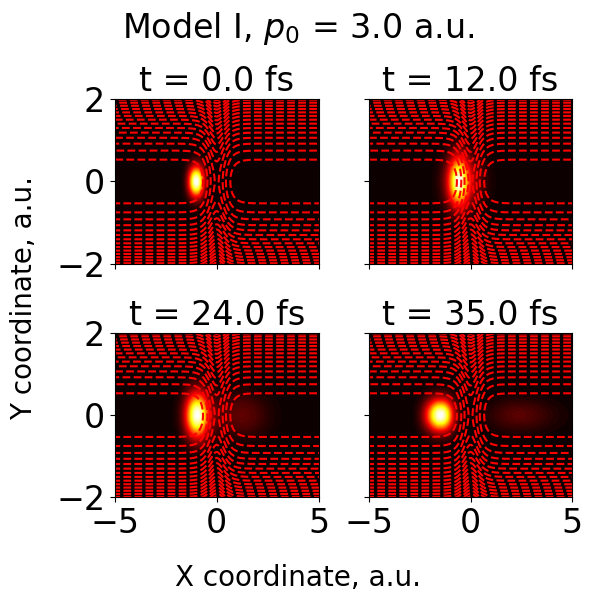

In [59]:
plot_quantum_dynamics("MartensI-case1-exact.pt", "Model I, $p_0$ = 3.0 a.u.")

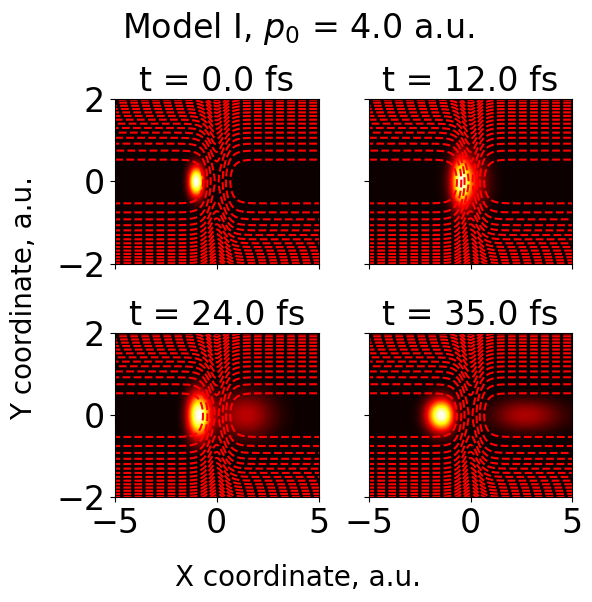

In [60]:
plot_quantum_dynamics("MartensI-case2-exact.pt", "Model I, $p_0$ = 4.0 a.u.")

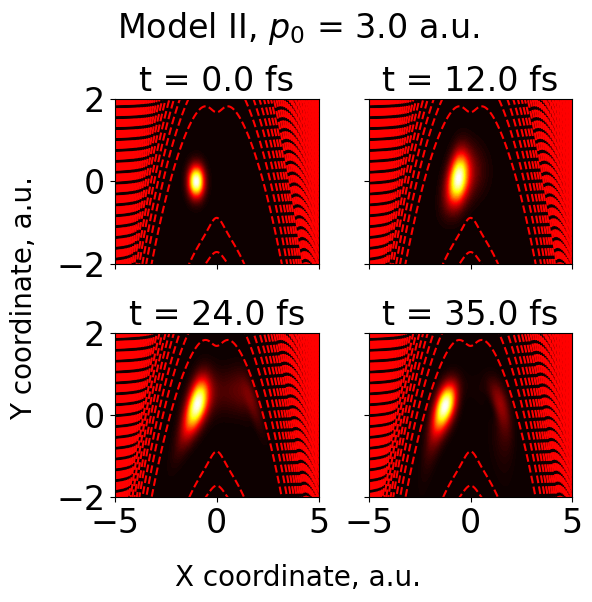

In [61]:
plot_quantum_dynamics("MartensII-case1-exact.pt", "Model II, $p_0$ = 3.0 a.u.")

In [62]:
plot_quantum_dynamics("MartensII-case2-exact.pt", "Model II, $p_0$ = 4.0 a.u.")

# 5. Plotting trajectory dynamics

In [28]:
def plot_trajectory_dynamics(filename_quantum, filename, title):
    
    f = torch.load(filename_quantum, weights_only=False) #"MartensII-case1-exact.pt")
    c = torch.load(filename, weights_only=False) # trajectories 

    x = c["q_traj"][:,:,0].clone().detach()
    y = c["q_traj"][:,:,1].clone().detach()
    
    # Create 2 row, 2 columns of subplots
    fig, axs = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True)
    
    for num, i in enumerate([0, 100, 200, 290]):         
        n = f["save_every_n_steps"]
        dt = f["dt"]
        Q = f["Q"]
        V = f["V"]
        t = i * dt /units.fs2au
        psi = f["psi_all"][int(i/n)]
        rho = (torch.abs( psi ) )**2 
        a, b = int((num - num%2)/2), int(num % 2)
        axs[a, b].set_title(F"t = { round(t,0) } fs", fontsize=24)
        axs[a, b].set_xlim(-5.0, 5.0)
        axs[a, b].set_ylim(-2.0, 2.0)
    
        axs[a, b].scatter(x[i, :], y[i, :], color="red") #contourf(Q[0], Q[1], rho, levels=100, cmap="hot")
        axs[a, b].contour(Q[0], Q[1], V, levels=100, colors='red', linestyles='--')

    # Centered shared x-axis label
    fig.suptitle(title, fontsize=24)
    fig.supxlabel('X coordinate, a.u.', fontsize=20)
    fig.supylabel('Y coordinate, a.u.', fontsize=20)
    plt.tight_layout()
    plt.show()

## 5.1. Model I

In [29]:
#plot_trajectory_dynamics("MartensI-case1-exact.pt", "classical-MartensI-case1-1.pt", "Model I, $p_0$ = 3.0 a.u. classical")
plot_trajectory_dynamics("MartensI-case1-exact.pt", "classical-MartensI-case1-1.pt", "Model I, $p_0$ = 3.0 a.u. classical")

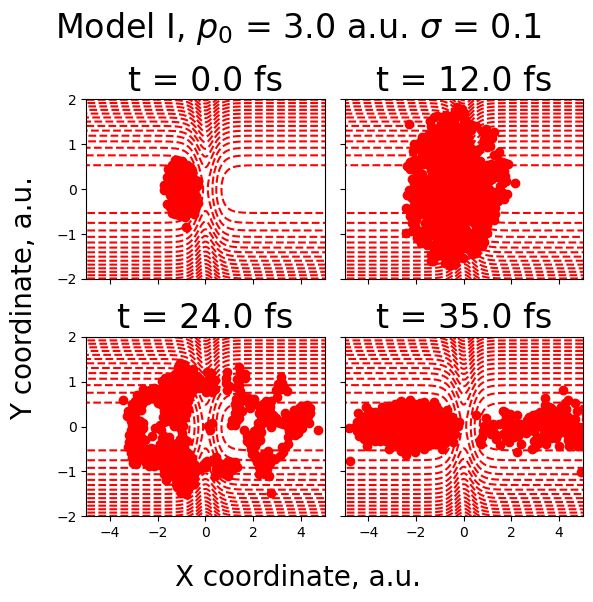

In [30]:
#plot_trajectory_dynamics("MartensI-case1-exact.pt", "bohmian-lorentzian-MartensI-case1-1.pt", "Model I, $p_0$ = 3.0 a.u. $\sigma$ = 0.1")
plot_trajectory_dynamics("MartensI-case1-exact.pt", "bohmian-mv_cauchy-MartensI-case1-1.pt", "Model I, $p_0$ = 3.0 a.u. $\sigma$ = 0.1")

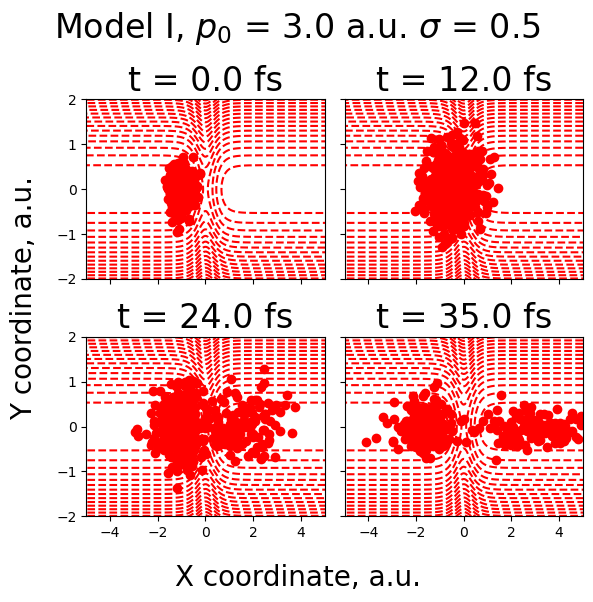

In [31]:
#plot_trajectory_dynamics("MartensI-case1-exact.pt", "bohmian-lorentzian-MartensI-case1-2.pt", "Model I, $p_0$ = 3.0 a.u. $\sigma$ = 0.5")
plot_trajectory_dynamics("MartensI-case1-exact.pt", "bohmian-mv_cauchy-MartensI-case1-2.pt", "Model I, $p_0$ = 3.0 a.u. $\sigma$ = 0.5")

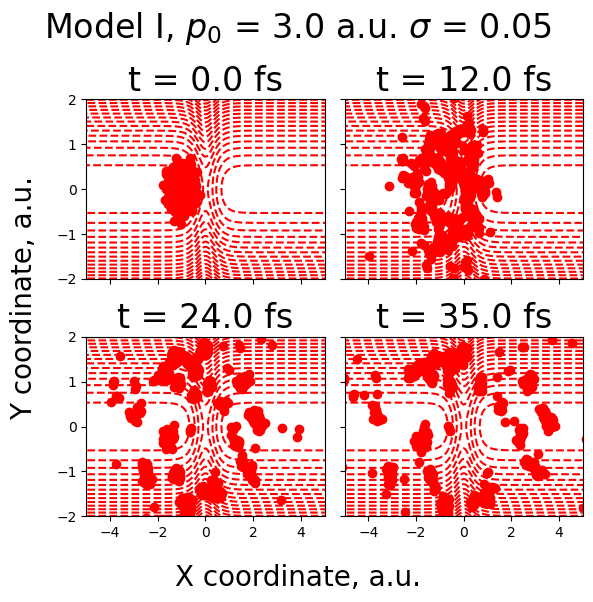

In [32]:
#plot_trajectory_dynamics("MartensI-case1-exact.pt", "bohmian-lorentzian-MartensI-case1-3b.pt", "Model I, $p_0$ = 3.0 a.u. $\sigma$ = 0.05")
plot_trajectory_dynamics("MartensI-case1-exact.pt", "bohmian-mv_cauchy-MartensI-case1-3b.pt", "Model I, $p_0$ = 3.0 a.u. $\sigma$ = 0.05")

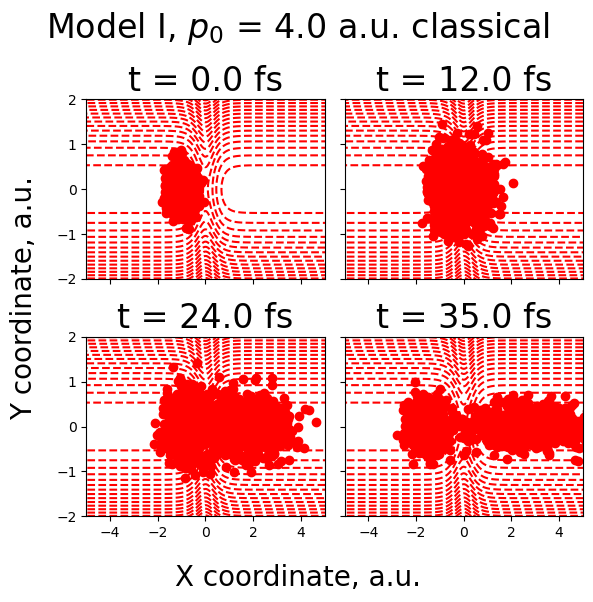

In [33]:
plot_trajectory_dynamics("MartensI-case2-exact.pt", "classical-MartensI-case2-1.pt", "Model I, $p_0$ = 4.0 a.u. classical")

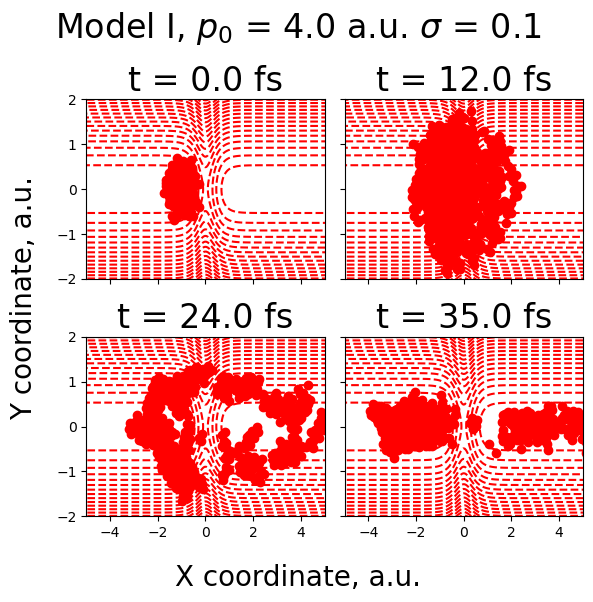

In [34]:
#plot_trajectory_dynamics("MartensI-case2-exact.pt", "bohmian-lorentzian-MartensI-case2-1.pt", "Model I, $p_0$ = 4.0 a.u. $\sigma$ = 0.1")
plot_trajectory_dynamics("MartensI-case2-exact.pt", "bohmian-mv_cauchy-MartensI-case2-1.pt", "Model I, $p_0$ = 4.0 a.u. $\sigma$ = 0.1")

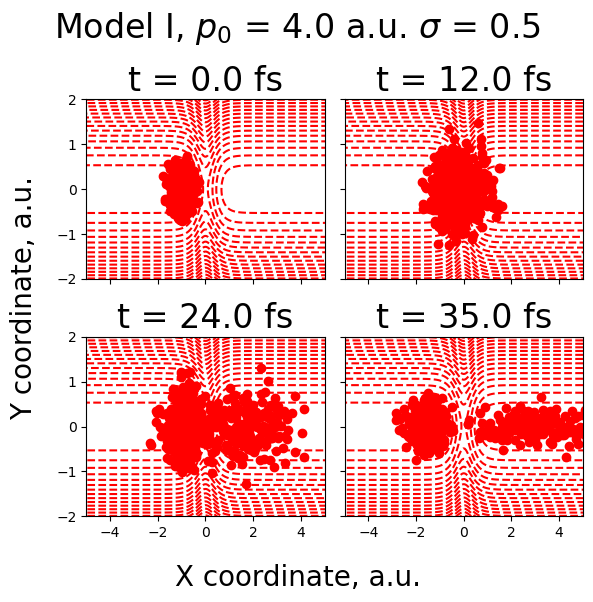

In [35]:
#plot_trajectory_dynamics("MartensI-case2-exact.pt", "bohmian-lorentzian-MartensI-case2-2.pt", "Model I, $p_0$ = 4.0 a.u. $\sigma$ = 0.5")
plot_trajectory_dynamics("MartensI-case2-exact.pt", "bohmian-mv_cauchy-MartensI-case2-2.pt", "Model I, $p_0$ = 4.0 a.u. $\sigma$ = 0.5")

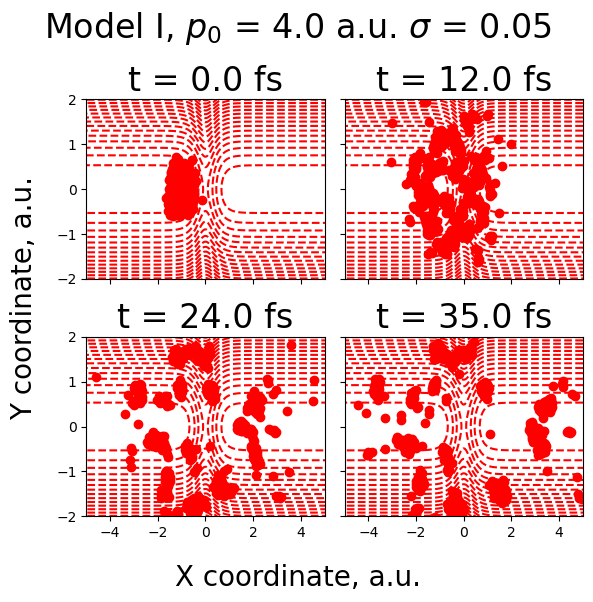

In [36]:
#plot_trajectory_dynamics("MartensI-case2-exact.pt", "bohmian-lorentzian-MartensI-case2-3b.pt", "Model I, $p_0$ = 4.0 a.u. $\sigma$ = 0.05")
plot_trajectory_dynamics("MartensI-case2-exact.pt", "bohmian-mv_cauchy-MartensI-case2-3b.pt", "Model I, $p_0$ = 4.0 a.u. $\sigma$ = 0.05")

## 5.2. Model II

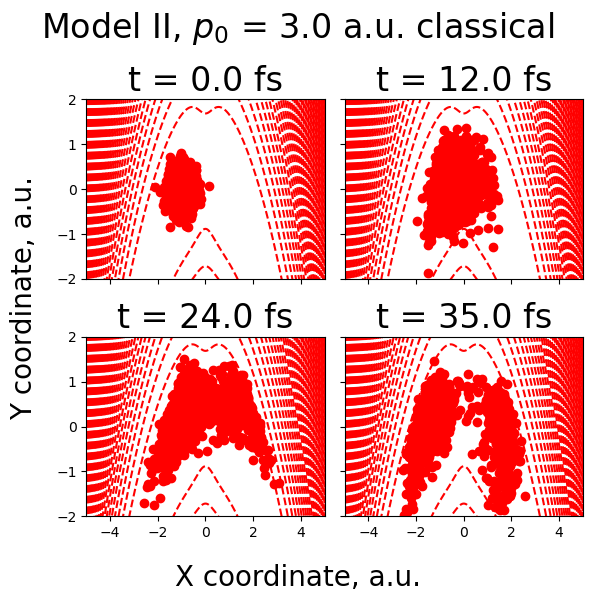

In [37]:
plot_trajectory_dynamics("MartensII-case1-exact.pt", "classical-MartensII-case1-1.pt", "Model II, $p_0$ = 3.0 a.u. classical")

In [38]:
#plot_trajectory_dynamics("MartensII-case1-exact.pt", "bohmian-lorentzian-MartensII-case1-1.pt", "Model II, $p_0$ = 3.0 a.u. $\sigma$ = 0.1")
plot_trajectory_dynamics("MartensII-case1-exact.pt", "bohmian-mv_cauchy-MartensII-case1-1.pt", "Model II, $p_0$ = 3.0 a.u. $\sigma$ = 0.1")

In [39]:
#plot_trajectory_dynamics("MartensII-case1-exact.pt", "bohmian-lorentzian-MartensII-case1-2.pt", "Model II, $p_0$ = 3.0 a.u. $\sigma$ = 0.5")
plot_trajectory_dynamics("MartensII-case1-exact.pt", "bohmian-mv_cauchy-MartensII-case1-2.pt", "Model II, $p_0$ = 3.0 a.u. $\sigma$ = 0.5")

In [40]:
#plot_trajectory_dynamics("MartensII-case1-exact.pt", "bohmian-lorentzian-MartensII-case1-3b.pt", "Model II, $p_0$ = 3.0 a.u. $\sigma$ = 0.05")
plot_trajectory_dynamics("MartensII-case1-exact.pt", "bohmian-mv_cauchy-MartensII-case1-3b.pt", "Model II, $p_0$ = 3.0 a.u. $\sigma$ = 0.05")

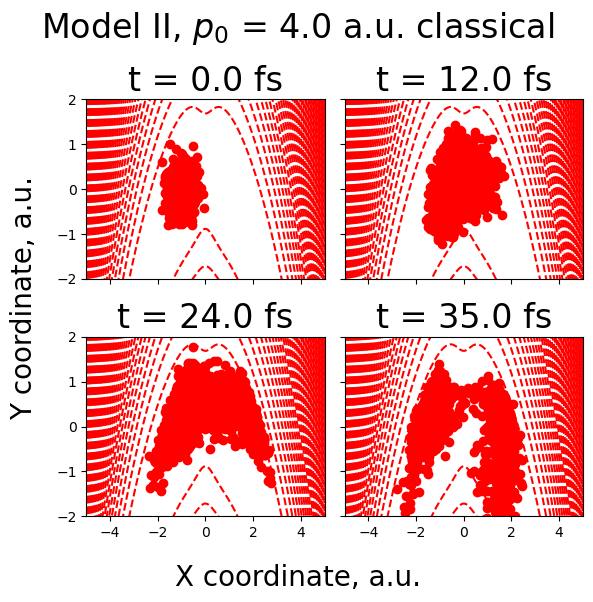

In [41]:
plot_trajectory_dynamics("MartensII-case2-exact.pt", "classical-MartensII-case2-1.pt", "Model II, $p_0$ = 4.0 a.u. classical")

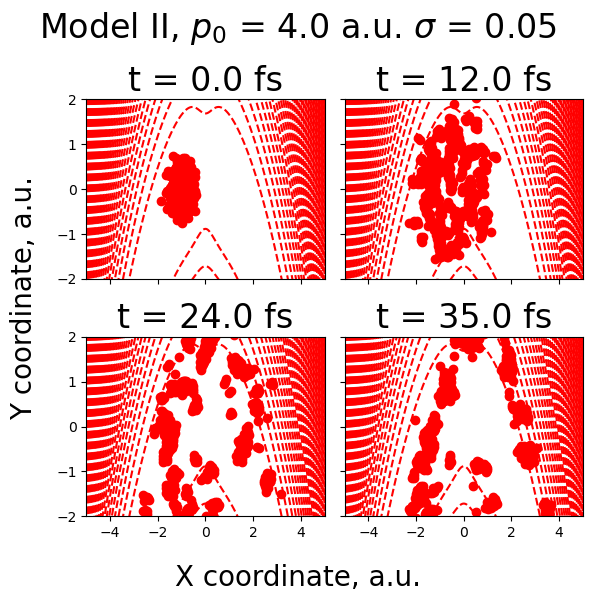

In [42]:
#plot_trajectory_dynamics("MartensII-case2-exact.pt", "bohmian-lorentzian-MartensII-case2-3b.pt", "Model II, $p_0$ = 4.0 a.u. $\sigma$ = 0.05")
plot_trajectory_dynamics("MartensII-case2-exact.pt", "bohmian-mv_cauchy-MartensII-case2-3b.pt", "Model II, $p_0$ = 4.0 a.u. $\sigma$ = 0.05")

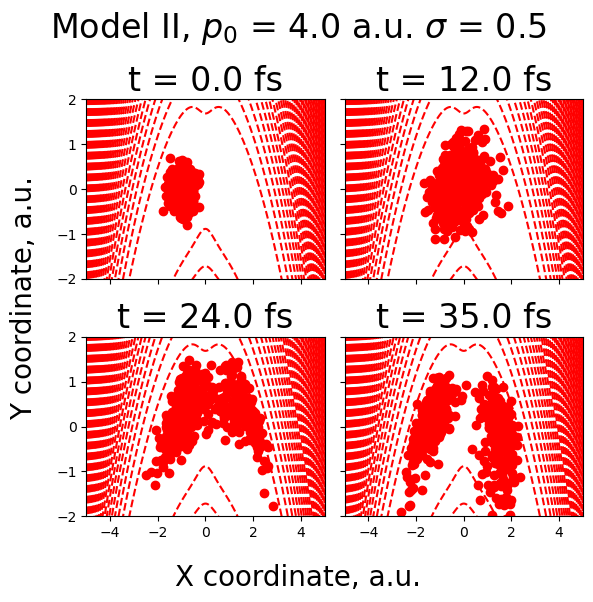

In [43]:
#plot_trajectory_dynamics("MartensII-case2-exact.pt", "bohmian-lorentzian-MartensII-case2-2.pt", "Model II, $p_0$ = 4.0 a.u. $\sigma$ = 0.5")
plot_trajectory_dynamics("MartensII-case2-exact.pt", "bohmian-mv_cauchy-MartensII-case2-2.pt", "Model II, $p_0$ = 4.0 a.u. $\sigma$ = 0.5")

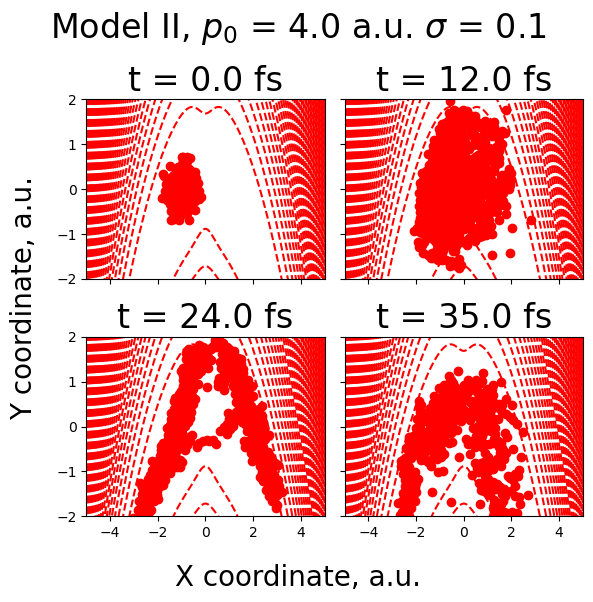

In [44]:
#plot_trajectory_dynamics("MartensII-case2-exact.pt", "bohmian-lorentzian-MartensII-case2-1.pt", "Model II, $p_0$ = 4.0 a.u. $\sigma$ = 0.1")
plot_trajectory_dynamics("MartensII-case2-exact.pt", "bohmian-mv_cauchy-MartensII-case2-1.pt", "Model II, $p_0$ = 4.0 a.u. $\sigma$ = 0.1")

# 6. Plotting density profiles and quantum potentials

In [69]:
def plot_rho_quant_pot_2D(filename_quantum, filename, _sigma, timestep):
    sigma = torch.tensor( [_sigma] )
    mass = torch.tensor( [2000.0, 2000.0] )

    qq = torch.load(filename_quantum, weights_only=False)    
    f = torch.load(filename, weights_only=False)    
    Q = f["q_traj"][timestep, :, :]
    
    x = torch.linspace(-5.0, 5.0, 301, requires_grad=True)
    y = torch.linspace(-5.0, 5.0, 301, requires_grad=True)
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    X, Y = torch.meshgrid(x, y, indexing='ij')  # 'ij' indexing matches matrix notation    
    coords = torch.stack([X, Y], dim=-1) 
   
    rho, U = [], []
    # Then each entry coords[i, j] is a 2D vector [x, y]
        
    nx, ny = coords.shape[0], coords.shape[1]
    for _x in coords.reshape(-1, 2):
        ntraj, ndof = Q.shape[-2], Q.shape[-1]
        #f = rho_lorentzian(_x, Q, sigma)
        f = compute.rho_mv_cauchy(_x, Q, sigma)
        u = compute.quantum_potential_original_gen(_x, Q, sigma, mass, compute.rho_mv_cauchy) 
        rho.append(f.detach())
        U.append(u.detach())
    rho = torch.tensor(rho)
    rho = rho.reshape(nx, ny)
    
    U = torch.tensor(U)
    U = U.reshape(nx, ny)
            
    #rho = rho/norm
    #norm = (rho.sum() * dx * dy).detach().item()
    #rho = rho / norm
    rho_x = rho.sum(axis=1)
    rho_y = rho.sum(axis=0)

    print("Total norm Bohmian = ", rho.sum() * dx * dy)

    n = qq["save_every_n_steps"]
    dt = qq["dt"]
    dq = qq["dq"]
    qQ = qq["Q"]
    #V = qq["V"]
    t = timestep * dt /units.fs2au
    psi = qq["psi_all"][int(timestep/n)]
    qrho = (torch.abs( psi ) )**2 
    qrho_x = qrho.sum(axis=1) #* dq[1]
    qrho_y = qrho.sum(axis=0) #* dq[0]
    
    # Grid of quantum calculuations
    qx = torch.linspace(qq["q_min"][0], qq["q_max"][0], qq["grid_size"][0])
    qy = torch.linspace(qq["q_min"][1], qq["q_max"][1], qq["grid_size"][1])
    
    sz = 16
    # Create 1 row, 2 columns of subplots
    fig, axs = plt.subplots(2, 2, figsize=(6, 6)) # sharex=True, sharey=True)
    
    axs[0,0].plot(x.detach(), rho_x, color="red", label="Bohmian") 
    axs[0,0].plot(qx, qrho_x, color="blue", label="Quantum") 
    axs[0,0].set_ylabel(r"$\rho (x)$", fontsize=18)
    axs[0,0].legend(fontsize=18)
    axs[0,0].tick_params(axis='x', labelsize=sz)
    axs[0,0].tick_params(axis='y', labelsize=sz) 
    axs[0,0].set_xlim(-5, 5)  
    
    axs[0,1].plot(y.detach(), rho_y, color="red", label="Bohmian") 
    axs[0,1].plot(qy, qrho_y, color="blue", label="Quantum") 
    axs[0,1].set_ylabel(r"$\rho$ (y)", fontsize=18)
    axs[0,1].legend(fontsize=16)
    axs[0,1].tick_params(axis='x', labelsize=sz)
    axs[0,1].tick_params(axis='y', labelsize=sz) 
    axs[0,1].set_xlim(-5, 5)

    

    X = X.detach()
    Y = Y.detach()
    axs[1,0].contourf(X, Y, rho, levels=100, cmap="hot")
    axs[1,0].plot([], [], color="none", label="Density")
    axs[1,0].legend(fontsize=14)
    axs[1,0].set_ylabel('Coordinate, a.u.', fontsize=18)
    axs[1,0].tick_params(axis='x', labelsize=sz)
    axs[1,0].tick_params(axis='y', labelsize=sz) 
    axs[1,0].set_xlim(-5, 5)
    axs[1,0].set_ylim(-5, 5)

    axs[1,1].contour(X, Y, U, levels=100, cmap='hot')
    axs[1,1].plot([], [], color="none", label="Quantum Potential")
    axs[1,1].legend(fontsize=14)
    axs[1,1].tick_params(axis='x', labelsize=sz)
    axs[1,1].tick_params(axis='y', labelsize=sz) 
    axs[1,1].set_xlim(-5, 5)
    axs[1,1].set_ylim(-5, 5)
    
    # Centered shared x-axis label
    title = F"$\sigma$ = {_sigma} t = { round(t,0) } fs"
    fig.suptitle(title, fontsize=20)
    fig.supxlabel('Coordinate, a.u.', fontsize=18)
    #fig.supylabel('Coordinate, a.u.', fontsize=18)
    plt.tight_layout()
    plt.show()

    f_bo1 = torch.load(F"{file_bohm}-1.pt", weights_only=False)  # sigma = 0.1, dt = 5
    f_bo2 = torch.load(F"{file_bohm}-2.pt", weights_only=False)  # sigma = 0.5, dt = 5 
    f_bo3 = torch.load(F"{file_bohm}-3.pt", weights_only=False)  # sigma = 0.05, dt = 5 - poor energy conservation
    f_bo3b = torch.load(F"{file_bohm}-3b.pt", weights_only=False)# sigma = 0.05, dt = 2.5 - good energy conservation

## 6.1 Model I

### 6.1.1 Case 1, sigma = 0.5

Total norm Bohmian =  tensor(0.9080, grad_fn=<MulBackward0>)


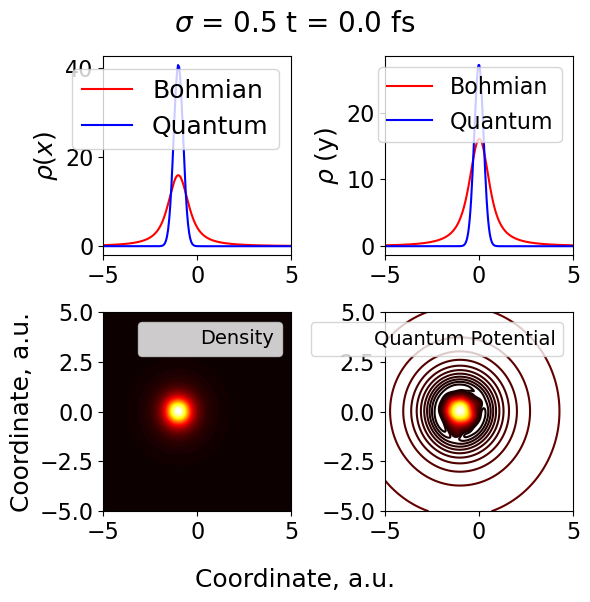

In [70]:
plot_rho_quant_pot_2D("MartensI-case1-exact.pt", "bohmian-mv_cauchy-MartensI-case1-2.pt", 0.5, 0)

Total norm Bohmian =  tensor(0.9088, grad_fn=<MulBackward0>)


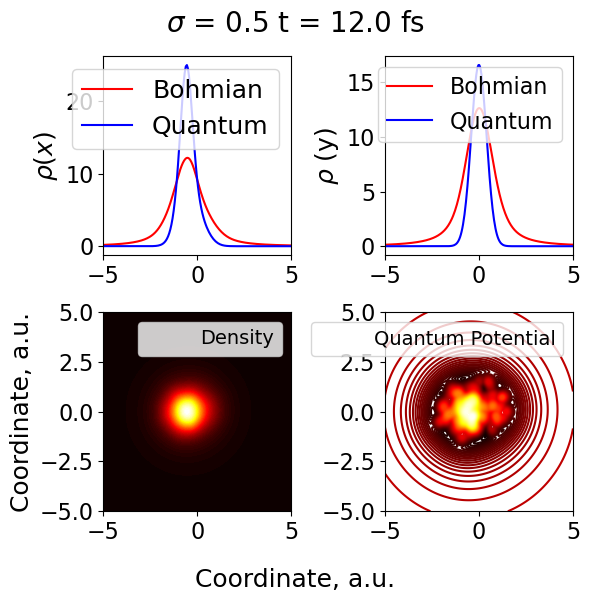

In [71]:
plot_rho_quant_pot_2D("MartensI-case1-exact.pt", "bohmian-mv_cauchy-MartensI-case1-2.pt", 0.5, 100)

Total norm Bohmian =  tensor(0.9055, grad_fn=<MulBackward0>)


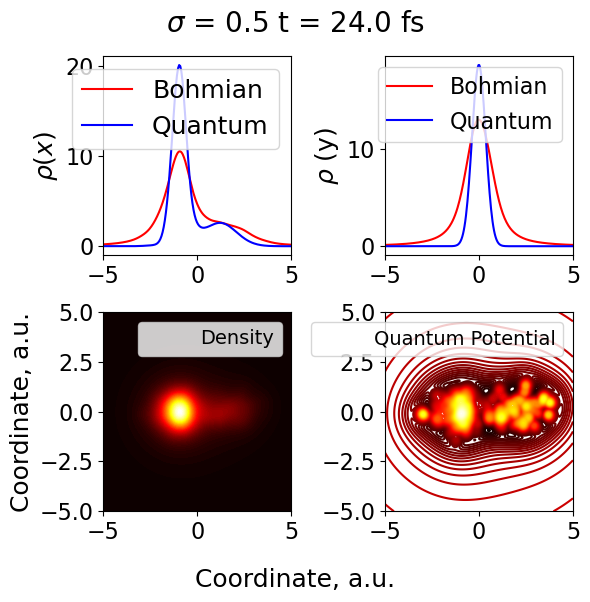

In [72]:
plot_rho_quant_pot_2D("MartensI-case1-exact.pt", "bohmian-mv_cauchy-MartensI-case1-2.pt", 0.5, 200)

Total norm Bohmian =  tensor(0.8860, grad_fn=<MulBackward0>)


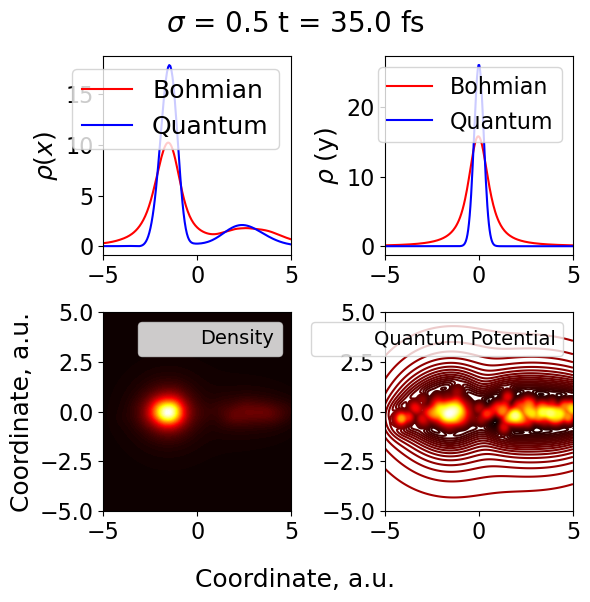

In [73]:
plot_rho_quant_pot_2D("MartensI-case1-exact.pt", "bohmian-mv_cauchy-MartensI-case1-2.pt", 0.5, 290)

### 6.1.2 Case 1, sigma = 0.05

Total norm Bohmian =  tensor(0.9908, grad_fn=<MulBackward0>)


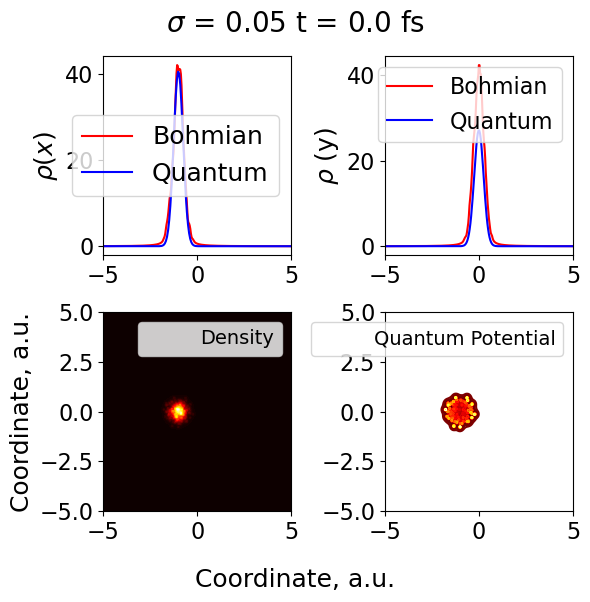

In [82]:
plot_rho_quant_pot_2D("MartensI-case1-exact.pt", "bohmian-mv_cauchy-MartensI-case1-3b.pt", 0.05, 0)

Total norm Bohmian =  tensor(0.9905, grad_fn=<MulBackward0>)


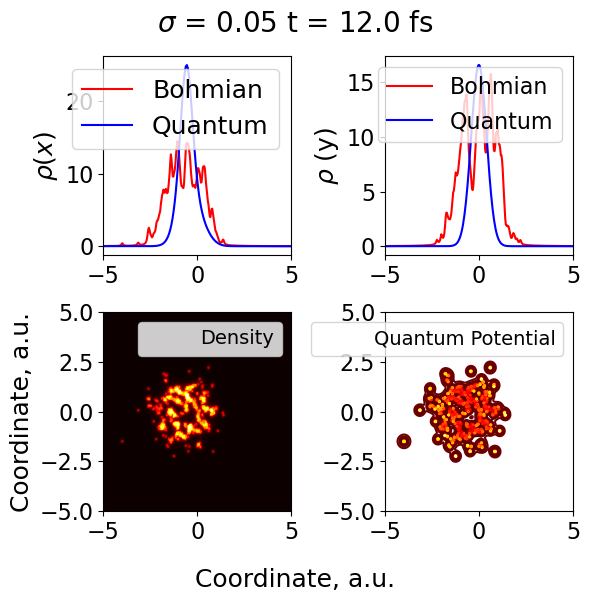

In [79]:
plot_rho_quant_pot_2D("MartensI-case1-exact.pt", "bohmian-mv_cauchy-MartensI-case1-3b.pt", 0.05, 100)

In [80]:
plot_rho_quant_pot_2D("MartensI-case1-exact.pt", "bohmian-mv_cauchy-MartensI-case1-3b.pt", 0.05, 200)

Total norm Bohmian =  tensor(0.9859, grad_fn=<MulBackward0>)


In [81]:
plot_rho_quant_pot_2D("MartensI-case1-exact.pt", "bohmian-mv_cauchy-MartensI-case1-3b.pt", 0.05, 290)

Total norm Bohmian =  tensor(0.9709, grad_fn=<MulBackward0>)


## 6.2 Model II

### 6.2.1 Case 1, sigma = 0.5

In [74]:
plot_rho_quant_pot_2D("MartensII-case1-exact.pt", "bohmian-mv_cauchy-MartensII-case1-2.pt", 0.5, 0)

Total norm Bohmian =  tensor(0.9081, grad_fn=<MulBackward0>)


In [75]:
plot_rho_quant_pot_2D("MartensII-case1-exact.pt", "bohmian-mv_cauchy-MartensII-case1-2.pt", 0.5, 100)

Total norm Bohmian =  tensor(0.9088, grad_fn=<MulBackward0>)


In [76]:
plot_rho_quant_pot_2D("MartensII-case1-exact.pt", "bohmian-mv_cauchy-MartensII-case1-2.pt", 0.5, 200)

Total norm Bohmian =  tensor(0.9058, grad_fn=<MulBackward0>)


Total norm Bohmian =  tensor(0.9038, grad_fn=<MulBackward0>)


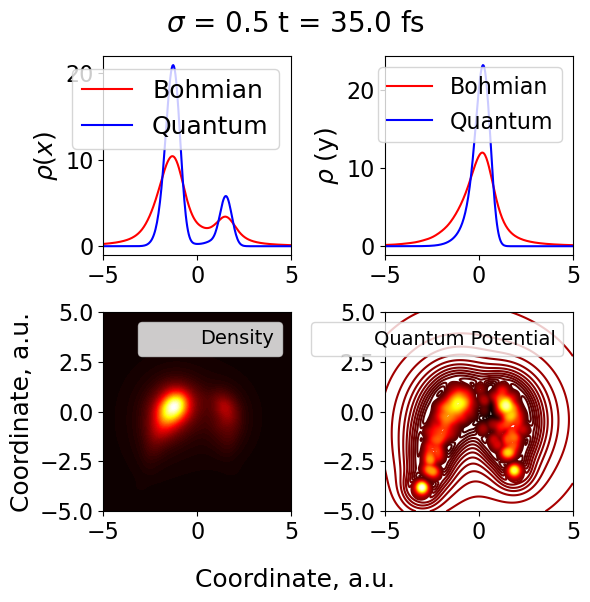

In [77]:
plot_rho_quant_pot_2D("MartensII-case1-exact.pt", "bohmian-mv_cauchy-MartensII-case1-2.pt", 0.5, 290)

### 6.2.2 Case 1, sigma = 0.05

Total norm Bohmian =  tensor(0.9908, grad_fn=<MulBackward0>)


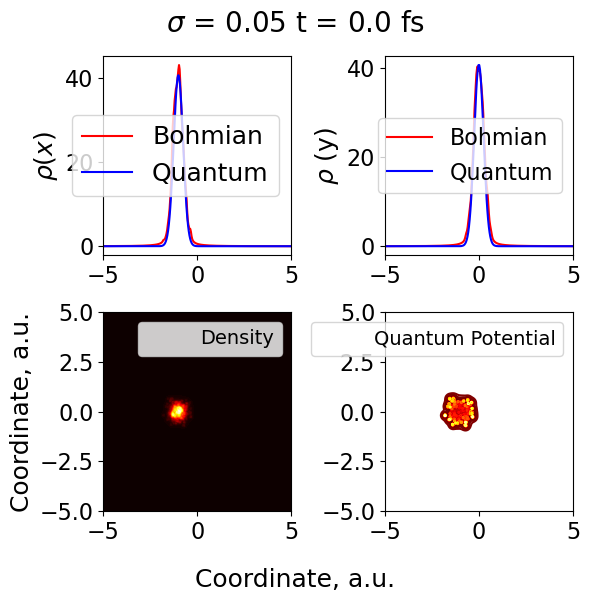

In [83]:
plot_rho_quant_pot_2D("MartensII-case1-exact.pt", "bohmian-mv_cauchy-MartensII-case1-3b.pt", 0.05, 0)

Total norm Bohmian =  tensor(0.9906, grad_fn=<MulBackward0>)


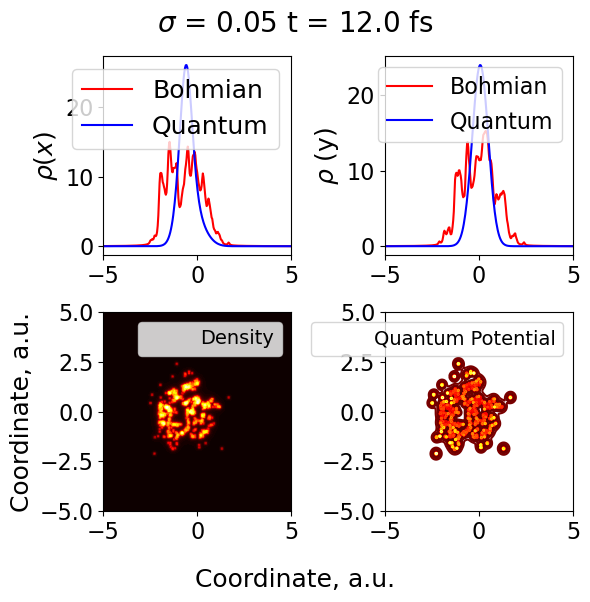

In [84]:
plot_rho_quant_pot_2D("MartensII-case1-exact.pt", "bohmian-mv_cauchy-MartensII-case1-3b.pt", 0.05, 100)

Total norm Bohmian =  tensor(0.9899, grad_fn=<MulBackward0>)


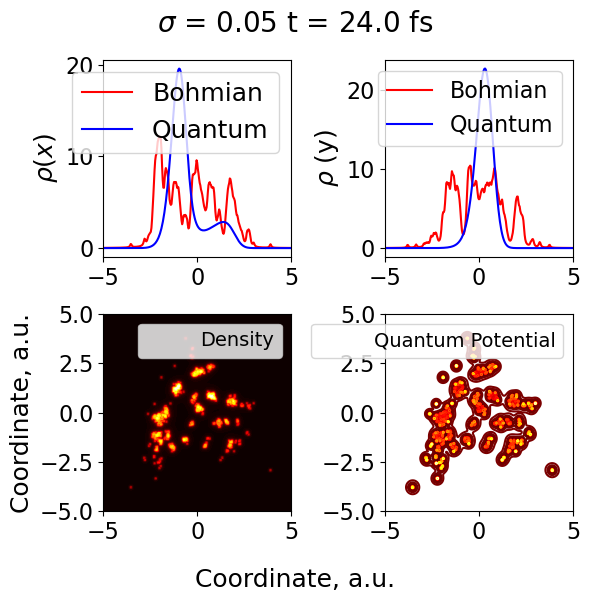

In [85]:
plot_rho_quant_pot_2D("MartensII-case1-exact.pt", "bohmian-mv_cauchy-MartensII-case1-3b.pt", 0.05, 200)

In [86]:
plot_rho_quant_pot_2D("MartensII-case1-exact.pt", "bohmian-mv_cauchy-MartensII-case1-3b.pt", 0.05, 290)

Total norm Bohmian =  tensor(0.9872, grad_fn=<MulBackward0>)
